In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohithsairamreddy/salary-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mohithsairamreddy/salary-data/versions/4


In [ ]:
df = pd.read_csv(os.path.join(path, "Salary_Data.csv"))

In [ ]:
# Display basic info
print(df.shape)
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Show first few rows
print(df.head())


(6704, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB
None
               Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     33.620859             8.094687  115326.964771
std       7.614633             6.059003   52786.183911
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000 

In [ ]:
df['Gender'] = df['Gender'].astype('category')
df['Education Level'] = df['Education Level'].astype('category')
df['Job Title'] = df['Job Title'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  6702 non-null   float64 
 1   Gender               6702 non-null   category
 2   Education Level      6701 non-null   category
 3   Job Title            6702 non-null   category
 4   Years of Experience  6701 non-null   float64 
 5   Salary               6699 non-null   float64 
dtypes: category(3), float64(3)
memory usage: 189.5 KB


In [ ]:
df['Age'] = df['Age'].astype(float)
df['Years of Experience'] = df['Years of Experience'].astype(float)
df['Salary'] = df['Salary'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  6702 non-null   float64 
 1   Gender               6702 non-null   category
 2   Education Level      6701 non-null   category
 3   Job Title            6702 non-null   category
 4   Years of Experience  6701 non-null   float64 
 5   Salary               6699 non-null   float64 
dtypes: category(3), float64(3)
memory usage: 189.5 KB


In [ ]:
# Check for missing values
df.isnull().sum()
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [ ]:
# Check how many duplicate rows exist
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Display duplicate rows
# print(duplicate_rows)

Number of duplicate rows: 4911


In [ ]:
# Remove duplicate rows (keeps first occurrence by default)
df = df.drop_duplicates()

# Reset index if needed
df.reset_index(drop=True, inplace=True)

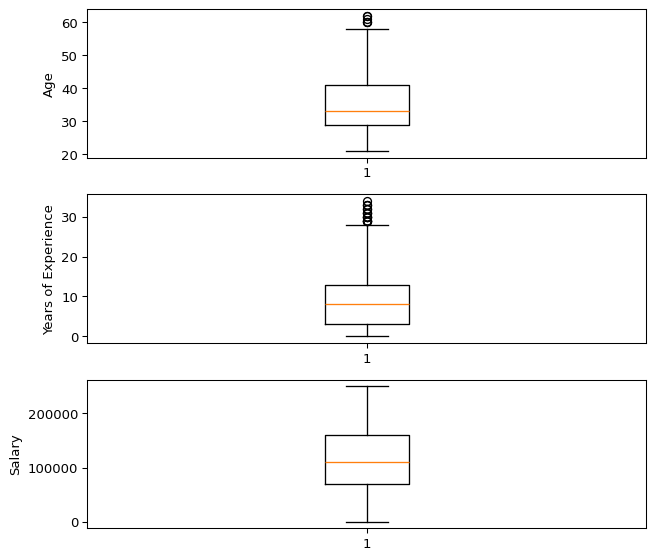

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

fig, axs = plt.subplots(len(numeric_cols), 1, dpi=95, figsize=(7, len(numeric_cols) * 2))
i = 0
for col in numeric_cols:
    axs[i].boxplot(df[col], vert=True) # Set vert=False for horizontal boxplots
    axs[i].set_ylabel(col)
    i+=1
plt.tight_layout()
plt.show()

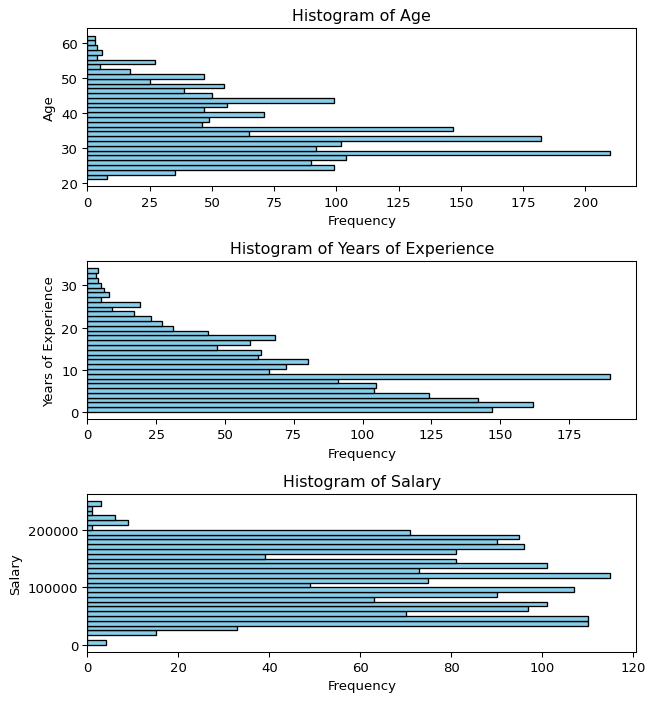

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Select only numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Create one subplot per numeric column
fig, axs = plt.subplots(len(numeric_cols), 1, dpi=95, figsize=(7, len(numeric_cols) * 2.5))

# Loop through each column and plot its histogram
for i, col in enumerate(numeric_cols):
    axs[i].hist(df[col], bins=30, color='skyblue', edgecolor='black', orientation='horizontal') # Set orientation='horizontal' for horizontal histograms
    axs[i].set_title(f"Histogram of {col}")
    axs[i].set_xlabel("Frequency") # Swap xlabel and ylabel for horizontal
    axs[i].set_ylabel(col) # Swap xlabel and ylabel for horizontal

plt.tight_layout()
plt.show()

In [ ]:
# Identify only numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Loop through each numerical column and apply IQR method
for col in numeric_cols:
    q1, q3 = np.percentile(df[col], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # Filter out outliers for this column
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# The DataFrame df now has outliers removed from all numeric columns
print("Cleaned dataset shape:", df.shape)

Cleaned dataset shape: (1761, 6)


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd

# Select numeric columns only
numeric_cols = df.select_dtypes(include='number').columns

# Create subplot layout
fig = make_subplots(rows=len(numeric_cols), cols=1, shared_xaxes=False,
                    subplot_titles=[f'Boxplot of {col}' for col in numeric_cols],
                    vertical_spacing=0.1)

# Add one boxplot per numeric column
for i, col in enumerate(numeric_cols, start=1):
    fig.add_trace(
        go.Box(x=df[col], name=col, orientation='h', marker_color='lightblue'),
        row=i, col=1
    )

# Update layout
fig.update_layout(height=300 * len(numeric_cols), title_text="Boxplots for All Numerical Columns", showlegend=True)

fig.show()


In [ ]:
features = ['Age','Gender', 'Education Level', 'Job Title','Years of Experience']
target = 'Salary'

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in features:
    if df[col].dtype == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])


In [ ]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Salary:", df['Salary'].mean())
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))


R² Score: 0.8043969613014941
Mean Salary: 112120.27314026121
Mean Absolute Error (MAE): 12739.923040604346
RMSE: 22395.94208993599
Mean Squared Error (MSE): 501578222.0957664


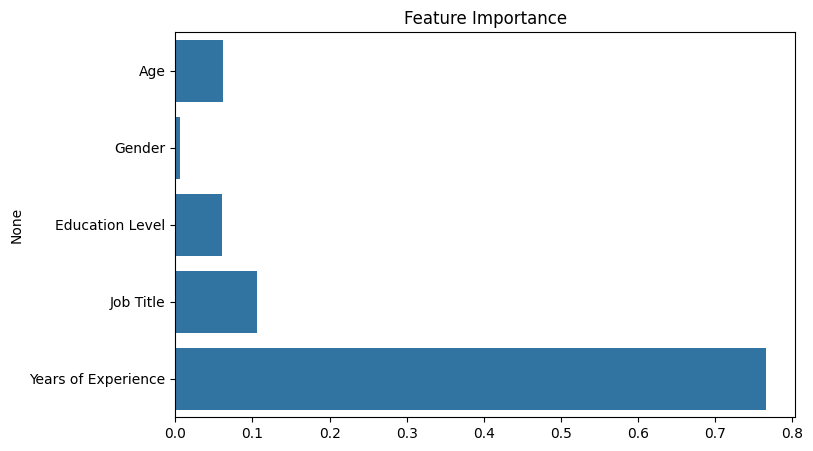

In [ ]:
# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 9, 12, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
}

grid = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_

# Evaluate tuned model
y_pred_best = best_model.predict(X_test)
print("Improved R² Score:", r2_score(y_test, y_pred_best))
print("R² Score:", r2_score(y_test, y_pred_best))
print("Mean Salary:", df['Salary'].mean())
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_best))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_best))



Best Parameters: {'criterion': 'squared_error', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Improved R² Score: 0.8298158882439597
R² Score: 0.8298158882439597
Mean Salary: 112120.27314026121
Mean Absolute Error (MAE): 13109.392912226267
RMSE: 20890.125225099888
Mean Squared Error (MSE): 436397331.92035466


In [ ]:
# Evaluate model on training data
y_train_pred = best_model.predict(X_train)

print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_pred_best))


Train R²: 0.9477627254565185
Test R²: 0.8298158882439597


In [ ]:
tuned_model = DecisionTreeRegressor(
    random_state=42,
    max_depth=8,             # limit tree depth (try 5–10)
    min_samples_split=20,    # increase to make splits less frequent
    min_samples_leaf=5       # increase to make leaf nodes contain more samples
)
tuned_model.fit(X_train, y_train)

y_pred_tuned = tuned_model.predict(X_test)
print("New R²:", r2_score(y_test, y_pred_tuned))


New R²: 0.8224348112624084


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print("Cross-validation R² scores:", scores)
print("Average R²:", scores.mean())


Cross-validation R² scores: [-0.63908848  0.15170712  0.45698394  0.64899831  0.676446  ]
Average R²: 0.25900937765322596


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))

# Cross-validation for RF
from sklearn.model_selection import cross_val_score
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print("RF Cross-validation R² scores:", rf_scores)
print("Average RF R²:", rf_scores.mean())


Random Forest R²: 0.8813737065721068
RF Cross-validation R² scores: [-0.27191688  0.21135039  0.77317692  0.78430987  0.80703493]
Average RF R²: 0.46079104688288536


In [ ]:
models = {
    'Decision Tree': tuned_model,
    'Random Forest': rf_model,
    # 'Gradient Boosting': gb_model
}

for name, m in models.items():
    scores = cross_val_score(m, X, y, cv=5, scoring='r2')
    print(f"{name}: Mean CV R² = {scores.mean():.3f}, Std = {scores.std():.3f}")


Decision Tree: Mean CV R² = 0.339, Std = 0.417
Random Forest: Mean CV R² = 0.461, Std = 0.429


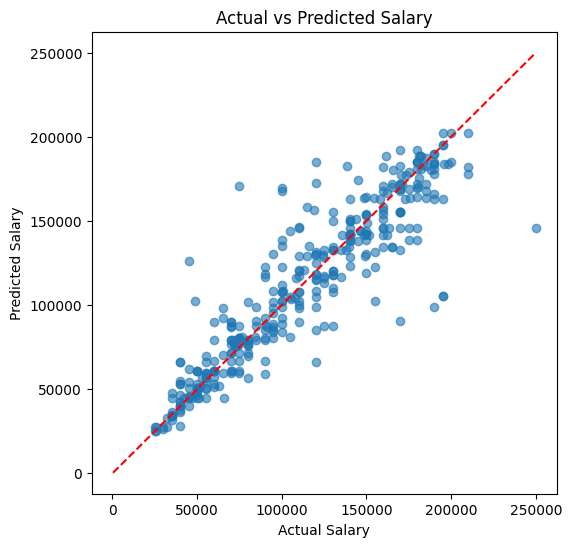

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


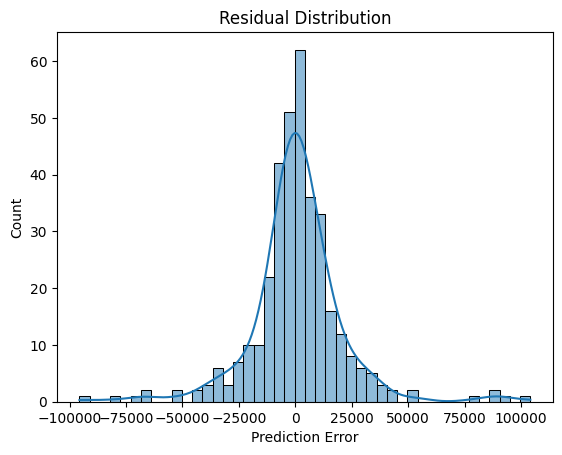

In [ ]:
residuals = y_test - y_pred_best
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Prediction Error")
plt.show()


In [ ]:
# Evaluate tuned model
y_pred_best = best_model.predict(X_test)
print("Improved R² Score:", r2_score(y_test, y_pred_best))
print("R² Score:", r2_score(y_test, y_pred_best))
print("Mean Salary:", df['Salary'].mean())
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_best))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_best))

Improved R² Score: 0.8298158882439597
R² Score: 0.8298158882439597
Mean Salary: 112120.27314026121
Mean Absolute Error (MAE): 13109.392912226267
RMSE: 20890.125225099888
Mean Squared Error (MSE): 436397331.92035466


In [ ]:
import joblib
joblib.dump(best_model, "decision_tree_salary_model.pkl")


['decision_tree_salary_model.pkl']